# <span style="color:#F72585"><center>Modelo de regresión Poisson</center></span>



<figure>
<center>
<img src="../Imagenes/Bacterias.jpg" width="600" height="600" align="center" /> 
</center>   
</figure>

<a href="https://commons.wikimedia.org/wiki/File:Bacteria_collage.jpg">148LENIN</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

## <span style="color:#4361EE">Referencias</span>

1. [Dobson y Baernett, An introduction oto Generalizer Linear Modesl](http://library.lol/main/472B57FA461867F6CFB4334BFED60010)

## <span style="color:#4361EE">Introducción</span>

En esta lección introducimos iuno de los modelos GLM mas utlizados en la práctica.

## <span style="color:#4361EE">Modelo Poission</span> 

### <span style="color:#4CC9F0">Distribución de probabilidad Poisson</span>

Primero vamos a recordar la distribución de Poisson. Este es un modelo de probabilidad que se encuentra usualmente en problemas de conteos. Piense por ejemplo en el número de vehículos que pasan por un punto de la ciudad en una hora y día de la semana en condiciones y fechas normales. Entonces ese número puede ser digamos 15, 16, 17, 18, 19, 20.

La función de probabilidad del modelo Poisson es dado por

$$
p(x|\lambda) = \frac{e^{-\mu} \mu^x }{x!}, \mu >0, x =0,1,2, \ldots
$$

El único parámetro $\lambda$ en este caso puede interpretarse como la rata de valores que pueden observarse por unidad de tiempo, area, etc. Por ejemplo, en el caso mencionamos arriba de los automóbiles, quizas esa rata sea un valor entre 17 y 18. 

Antes de avanzar vamos a suponer $\mu = 17.5$ y hagamos un gráfico de la función de probabilidad. Pero inicialmente vamos a calcular la media y la varianza de la distribución.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson 

In [28]:
# media y varianza de la distribución Poisson(17.5)
mu = 17.5
pois = poisson(mu)
media, var = pois.stats(moments="mv")
print('Distribución Poisson(17.5); media = {}, varianza {}'.format(media, var))

# calcula algunos cuantiles de la distribución
prob = np.array([0.25, 0.5, 0.75])
cuantiles = pois.ppf(prob)
print('Distribución Poisson(17.5); probabilidades={}; cuantiles={}'.format(prob, cuantiles))

Distribución Poisson(17.5); media = 17.5, varianza 17.5
Distribución Poisson(17.5); probabilidades=[0.25 0.5  0.75]; cuantiles=[15. 17. 20.]


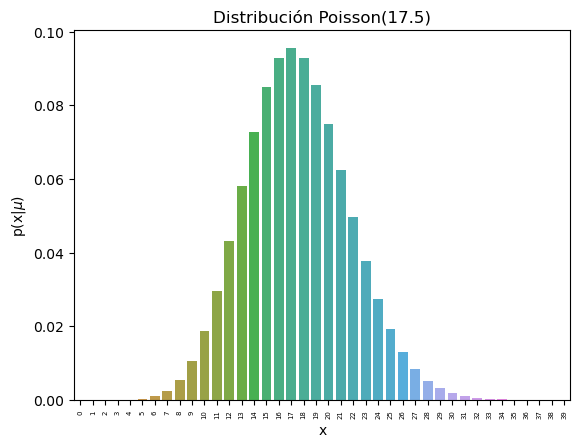

In [60]:
#Calcula los valores de probabilidad para los valores 0, 1, 2, ...,100
# datos
import pandas as pd
x = np.arange(40)
prob_p = pois.pmf(datos)
data = pd.DataFrame(zip(x,prob_p))
data.columns=['x','p']
ax = sns.barplot(data=data, x='x', y='p')
ax.set(xlabel='x', ylabel='p(x|$\mu$)', title='Distribución Poisson({})'.format(mu))
ax.set_xticklabels(x, rotation=90, size=5)
plt.show()

## <span style="color:#4361EE">Estimación puntual del parámetro $\mu$</span>

Supongamos que se hacen $n$ observaciones independientes de una distribución Pois$(\mu)$. La distribución conjunta es data por

$$
p(x_1, x_2, \ldots, x_n|\mu) = \prod_{i=1}^n Pois(x_i|\mu) = \prod_{i=1}^n \frac{e^{\mu} \mu^{x_i}}{x_i!}
$$

Asumamos que a priori $\mu \sim U[0, 1000]$.  Sea $\mathbf{x} = (x_1, x_2, \ldots, x_n))$

El teorema de Bayes nos lleva a que

$$
f(\mu|\mathbf{x}) = \prod_{i=1}^n \frac{e^{-\mu} \mu^{x_i}}{K} , 
$$

en donce $K>0$ es la constante de normalizacion de la densidad $f(\mu|\mathbf{x})$. Supongamos que se tiene la realización de la muestra. La moda de la densidad $f(\mu|\mathbf{x})$ se llama estimación máximo verosímil del parámetro.

La función de pérdida asociada es dada por  $\mathcal{L}(\mu)=-\log f(\mu|\mathbf{x})$. Entonces se tiene que

$$
\mathcal{L}(\mu) = \sum_{i=1}^n \mu - x_i\log \mu
$$

Derivando con respecto a $\mu$ e igualando a cero se obtiene la solución

$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^n x_i.
$$

En el ejemplo de los vehículos, se tiene que $n=6$, $\sum_{i=1}^n = 105$,  en consecuencia se tiene que

$$
\hat{\mu} = \frac{105}{6} = 17.5.
$$

La siguiente imagen muestra la función de pérdida $\mathcal{L}(\mu)$.

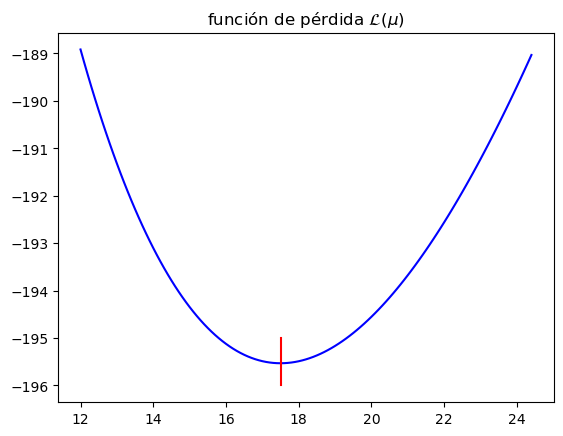

In [84]:
x = np.array(np.arange(15,21))
mu = np.arange(12, 24.5,0.1)
def loss(mu,x):
    return np.sum(mu - np.log(mu)*x)
y = np.array([loss(m,x) for m in mu])

z = [17.5, 17.5]
w = [-196., -195]
plt.plot(mu,y,color='blue')
plt.plot(z,w, color='red')
plt
plt.title('función de pérdida $\mathcal{L}(\mu)$')
plt.show()

## <span style="color:#4361EE">Estimación por intervalo del parámetro $\mu$</span>

Podemos hacer directamente la estimación de un intervalo de credibilidad que contenga el intervalo de confianza con una probabilidad dada, digamos del 95%. Para hacerlo, vamos a revisar brevemente la distribución Gama.

### <span style="color:#4CC9F0">Distribución Gamma</span>

La distribución Gama aparece aparece de manera natural cuando se tienen mediciones continuas positivas. La distribución Gama con parámetros $(\alpha, \beta)$ tiene como función de densidad $gamma(\alpha,\beta)$ dada por

$$
\text{gamma}(x|\alpha,\beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} e^{-\beta x} x^{\alpha-1}
$$

### <span style="color:#4CC9F0">Distribución de $f(\mu|\mathbf{x})$</span>

Observe que  
$$
f(\mu|\mathbf{x}) = \prod_{i=1}^n \frac{e^{-\mu} \mu^{x_i}}{K} = \frac{e^{-n\mu} \mu^{\sum_i x_i}}{K}
$$


$$
f(\mu|\mathbf{x}) = \text{gamma}\left(n,\sum_i x_i + 1\right)
$$

### <span style="color:#4CC9F0">Intervalo de credibilidad de probabilidad 0.95</span>

Con este última ecuación es inmediato construir intervalos de credibilidad con 95% de probabilidad. En nuestro ejemplo tenemos

In [91]:
from scipy.stats import gamma

beta = 6
scale = 1/beta
alpha = 105 + 1
gama = gamma(a=alpha,scale=scale)

LCI,UCI = gama.interval(0.95)
print(np.round(LCI,2),np.round(UCI))

14.46 21.0


### <span style="color:#4CC9F0">Regresión Poisson</span>

Ejemplo tomado de [Regresión de Poisson](https://estadistica-dma.ulpgc.es/MEAV/Ejemplo_Regresi%C3%B3n_Poisson.html). En un estudio sobre la población de un parásito se hizo un recuento de parásitos en 15 localizaciones con diversas condiciones ambientales. Los datos obtenidos son los siguientes:

In [99]:
import pandas as pd

parasitos = {'Temperatura':[15,16,24,13,21,16,22,18,20,16,28,27,13,22,23],
             'Humedad': [70,65,71,64,84,86,72,84,71,75,84,79,80,76,88],
             'Conteo':[156,157,177,145,197,184,172,187,157,169,200,193,167,170,192]}
parasitos = pd.DataFrame(parasitos)
parasitos 

,Temperatura,Humedad,Conteo
0,15,70,156
1,16,65,157
2,24,71,177
3,13,64,145
4,21,84,197
5,16,86,184
6,22,72,172
7,18,84,187
8,20,71,157
9,16,75,169


### <span style="color:#4CC9F0">Estadísticas Descriptivas</span>

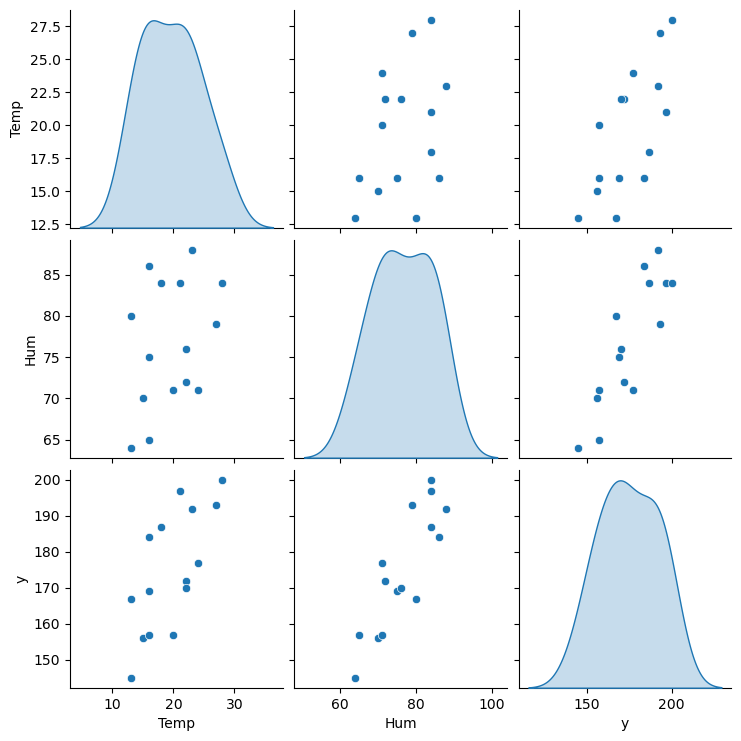

In [96]:
import seaborn as sns
sns.pairplot(parasitos, diag_kind="kde")
plt.show()

### <span style="color:#4CC9F0">Planteamiento del problema</span>

Por razones de claridad donotaremos Temperatura, Humedad y Conteo respectivamente como $\mathbf{x}_1,\mathbf{x}_2$ y $\mathbf{y}$. Supondremos que tenemos una muestra de vectores independientes $(y_i,x_{1i}, x_{2i})^t$, $i=1, 2, \ldots, n$. Las gráficas descriptivas revelan una relación lineal entre la variable de Conteo y las variables Temperatura y Humedad. Como Conteo es realmente una variable de conteo, la relación entre las variables se plantea de la siguiente forma.

$$
\begin{align}
y_i &\sim \text{Poi}(\mu_i)\\
\log \mu_i &=  w_1x_{1i} + w_2x_{2i} + b
\end{align}
$$

La razón de escribir $\log \mu_i$, en lugar de simplemente $\mu_i$ es la siguiente. Todos los $\mu_i>0$, pero las expresiones lineales $w_1x_{1i} + w_2x_{2i} + b$ pueden toma cualquier valor real. Al tomar $\log \mu_i$ desaparece el problema. La función $\log$ en este caso se llama función de enlace. Esta función pone en comunicación el predictor lineal $w_1x_{1i} + w_2x_{2i} + b$ con la esperanza $\mu_i$ de las variables $y_i$.

Para completar el modelo asumiremos las siguientes distribuciones a priori.

$$
\begin{align}
w_1 &\sim U[-1000, 1000]\\
w_2 &\sim U[-1000, 1000]\\
b &\sim U[-1000, 1000]
\end{align}
$$



### <span style="color:#4CC9F0">Modelo estadístico</span>

Vamos a denotar $\mathbf{y} = (y_1, y_2, \ldots, y_n)$, $\mathbf{x} = [x_{ij}]_{n\times 2}$,  $\mathbf{w} = (w_1, w_2)$, $\mathbf{x}_i =(x_{1i}, x_{2i})^t$


Asumiremos que las variables $[y_i|x_{1i},x_{2i}, w_1,w_2,b ]$ son independientes. En consecuencia la distribución conjunta se dada por

$$
p(\mathbf{y}|, \mathbf{w}, b) = \frac{1}{2000^3}\prod_{i=1}^n \frac{e^{-\mu_i} \mu_i^{y_i}}{y_i!}
$$

Usando el teorema de Bayes se obtiene la distribución condicional de $(\mathbf{w}, b |\mathbf{x})$:

$$
\begin{align}
f(\mathbf{w}, b |\mathbf{x}) &= \prod_{i=1}^n \frac{e^{-\mu_i} \mu_i^{y_i}}{K},\\
\log \mu_i &=  w_1x_{1i} + w_2x_{2i} + b,
\end{align}
$$

en donde $K$ es la constante de normalización de la densidad conjunta. La estimación máximo verosímil es la moda de la densidad $f(\mathbf{w}, b |\mathbf{x})$. Para encontrarla, usaremos la función de pérdida $\mathcal{L}(\mathbf{w}, b) = - \log f(\mathbf{w}, b |\mathbf{x})$. Omitiendo la constante de  normalización se tiene entonces

$$
\begin{align}
\mathcal{L}(\mathbf{w}, b) &= - \sum_i \left[ -(\mu_i) + y_i \log (\mu_i) \right]\\
\log \mu_i &=  w_1x_{1i} + w_2x_{2i} + b,
\end{align} 
$$

En el lenguaje de los modelos de regresión $\mu_i$ es identificado como la variable predictora. Por esa razón tomamos la licencia de escribir

$$
\hat{y_i} = \mu_i
$$

### <span style="color:#4CC9F0">Gradiente</span>

Es inmediato ver que

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial \mu_i} &=  \sum_i \left[1-\frac{x_i}{\mu_i}\right]\\
\frac{\partial \mu_i}{\partial w_1} &= \mu_ix_{1i}\\
\frac{\partial \mu_i}{\partial w_2} &= \mu_ix_{2i}\\
\frac{\partial \mu_i}{\partial b} &= \mu_i\\
\end{align}
$$

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial w_1} &= \sum_i \left[1 -  \frac{y_i}{\mu_i} \right]\mu_ix_{1i} = \sum_i \left[\mu_i -  y_i \right]x_{1i} = \sum_i \left[\hat{y}_i -  y_i \right]x_{1i}\\
\frac{\partial \mathcal{L}}{\partial w_2} &= \sum_i \left[1 -  \frac{y_i}{\mu_i} \right]\mu_ix_{2_i} = \sum_i \left[\mu_i -  y_i \right]x_{2i}=  \sum_i \left[\hat{y}_i -  y_i \right]x_{2i}\\
\frac{\partial \mathcal{L}}{\partial b} &= \sum_i \left[1 -  \frac{y_i}{\mu_i} \right]\mu_i = \sum_i \left[\mu_i -  y_i \right] = \sum_i \left[\hat{y}_i -  y_i \right]
\end{align}
$$



### <span style="color:#4CC9F0">Optimización: Gradiente descendiente</span>

Dejamos como ejercicio la implementación del algoritmo de optimización para estimar los parámetros del modelo. Le pedimos comparar con los resultados que vamos a obtener con la librería `statsmodels` de Python.

El siguiente fragmento de código incluye algunas piezas que puede usar para su implementación.

In [ ]:
# calculo del gradiente
def grad(param x , y):
    y_hat = np.exp(x @ param)
    err   = y_hat - y
    gradient = np.transpose(x) @ err
    return gradient
    
# paso de optimización
def step(param, gradient,learning):
    return param -learning*gradient

# función de pérdida
def loss(param, x,y):
    y_hat = np.exp(x @ param)
    val = y*np.log(y_hat)
    return np.sum(y_hat - val)

# agregar columna de unos a X  
def add_intercept(x):
    return np.hstack(X, np.ones(x.shpae[1]))

# implementación del algoritmo gradiente descendiente    
def optim(param_0, x, y, , learning_0, max_iter=50, eps=1e-4, rate = 0.8):
    leraning = learning_0
    new = param_0
    loss_l = []
    itera = 1
    
    while itera < max_iter:
        gradient = grad(param, x, y)
        param = new_param
        new_param = step(param, gradient, learning)
        los = loss(w, b ,x , y, z)
        loss_l.append(los)
        
        error = np.sum(np.abs(new_param- param))
        if error <= eps:
            break
        learning  *= rate
    
    if itera < max_iter:
        converge = True
    else:
        converge = False
    
    return {'param': param, 'loss':loos_l, 'converge': converge, 'last_loss': loos_l[-1]}



#### <span style="color:#4CC9F0">Ejercicio</span>

Implemente el algortime de optimizacón para estimar el parametro del problema.

### <span style="color:#4CC9F0">Mdodelos GLM con statsmodels de Python</span>

In [ ]:
# conda install -c anaconda statsmodels

In [26]:
# librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# datos
parasitos = {'Temperatura':[15,16,24,13,21,16,22,18,20,16,28,27,13,22,23],
             'Humedad': [70,65,71,64,84,86,72,84,71,75,84,79,80,76,88],
             'Conteo':[156,157,177,145,197,184,172,187,157,169,200,193,167,170,192]}
parasitos = pd.DataFrame(parasitos)

# prepara los datos para la regresión
X = parasitos.drop("Conteo", axis=1)
y = parasitos.Conteo
nomb_caract = X.columns.to_list()

# escala las características (variables)
standizer = StandardScaler()
X = standizer.fit_transform(X)

# revisa número de valores únicos en cada característica
print('Número de valores únicos por variable\n', parasitos.select_dtypes("int").nunique())

# ajusta un modelo de regresión de Poisson a los datos
exog = sm.add_constant(X)
poission_model = sm.GLM(y, exog, family=sm.families.Poisson())
result = poission_model.fit()
result.summary(xname=['Intercepto'] + nomb_caract)

Número de valores únicos por variable
 Temperatura    11
Humedad        12
Conteo         14
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Conteo   No. Observations:                   15
Model:                            GLM   Df Residuals:                       12
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53.462
Date:                Sun, 20 Nov 2022   Deviance:                       1.9468
Time:                        16:03:14   Pearson chi2:                     1.94
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7536
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercepto      5.1600      0.020    263.202      0.000       5.122       5.198
Temperatura     0.0417      0.021      2.018      0.044       0.001       0.082
Humedad         0.0664      0.021      3.163      0.002       0.025       0.108
===============================================================================
"""

## <span style="color:#4361EE">Interpretación de la salida de la regresión </span>

### <span style="color:#4CC9F0">Coeficientes y p-valores</span>

1. La estimación de los coeficientes , `coef`, en la salida indica el cambio en el logaritmo de los $\mu_i$, es decir en el logartimo de la predcciones del modelos. Por ejemplo, un aumento de una unidad en la variable predictora *Temperatura* está asociado con un cambio promedio de 0.0417 en el logaritmo de la variable de respuesta *Conteo*, manteniendo la variable *Humedad* sin ningún cambio.Esto significa que los valores más altos de *Temperatura* están asociados con una mayor probabilidad de la variable *Conteo*.

1. El error estándar, `std err` da una idea de la variabilidad asociada con la estimación del coeficiente. Puede interpretar el error estándar como una estimación  desviación estándar de la distribución posterior del respectivo coeficiente.

1. `El valor z`. Se obtiene al dividir la estimación del coeficiente por el error estándar.
1. El `p- valor` Pr(>|z|)  dice la probabilidad asociada con un valor *z* particular. Básicamente, esta probabilidad nos dice qué tan bien cada variable predictora puede predecir el valor de la variable de respuesta en el modelo. Por ejemplo, el p-valor asociado con el valor *z* para la variable *Temperatura* es .044. Dado que este valor es inferior a 0,05, diríamos que *Temperatura* es una variable predictora estadísticamente significativa en el modelo. 
1. `Intervalo de confianza`: [0.025, 0.975]. Es una estimación por intervalo del 95%. La salida en esta caso no puede interpretarse directamente como un intervalo de credibilidad, pero es una aproximación razonable. En el ejemplo el intervalos de confianza reportado para el parámetro *Temperatura* es [0.001, 0.082].

### <span style="color:#4CC9F0">Bondad de ajuste</span>

Las medidas de bondad de ajuste indican que tan bien ajusta el modelo a los datos. Si no está acostubrado o acostumbrada a estas medidas revise las siguientes dos secciones.




#### <span style="color:#4CC9F0">Sobre la Deviance</span>

La devianza es una medida de la bondad de ajuste de los modelos lineales generalizados. O más bien, es una medida de desajuste, puesto que valores más altos indican un peor ajuste. 

Supongamos que en un modelo estadístico $\boldsymbol{\beta}$ denota el vector de parámetros del modelo. Con $\boldsymbol{\beta}_{max}$ denotamos el vector de parámetros  con el  máximo de posibles parámetros en el modelo. En este caso $\boldsymbol{\beta}_{max}$ por lo general corresponde al caso en el cual se toma $\mu_i = y_i$. Técnicamente la deviance para un modelo es definida por 

$$
\text{deviance} = -2\left[\log p(\mathbf{y}|\hat{\boldsymbol{\beta}}_{max},\mathbf{X} ) - \log p(\mathbf{y}|\hat{\boldsymbol{\beta}}, \mathbf{X}) \right].
$$

En la expresión de la deviance $\hat{\boldsymbol{\beta}}$ es la estimación de $\boldsymbol{\beta}$.

La deviance es una variable aleatoria que tiene aproximadamente distribución $\chi^2(n-p)$, en donde $n$ es el tamaño del vector $\boldsymbol{\beta}_{max}$ y $p$ el tamaño del vector $\boldsymbol{\beta}$.

En la distribución $\chi^2(k)$, el parámetro $k$ se llama grados de libertad (`Df`). La esperanza de la distribución $\chi^2(k)$ es $k$.




1. La `deviance nula` en la salida  dice qué tan bien se puede predecir la variable de respuesta mediante un modelo con solamente con el término de intercepto. Esta medida no es mostrada en la salida.

1. La `desviance residual`  dice qué tan bien se puede predecir la variable de respuesta mediante el modelo específico que ajustamos con *p* variables predictoras. Cuanto menor sea el valor, mejor podrá el modelo predecir el valor de la variable de respuesta. La deviance residual es reportada simplemente como `Deviance`.  La deviance residual de calcula como
1. la `deviance del modelo`. Esta es la reportada por *statsmodel* y definida por
$$
\text{Deviance modelo} = \text{deviance nula} -  \text{deviance residual}.
$$
*Statsmode*l reporta la deviance del modelo como `Deviance`.

Los grados de libertad de la distribución de cada deviance se calculan de la siguiente manera.

* df(deviance nula) = $n-1$.
* df(deviance residual) = $n-p$.
* df(deviance model0) = df(deviance nula) - df(deviance residual) = $p-1$.

#### <span style="color:#4CC9F0">Como interpretar  la Deviance</span>

La deviance debe interpretarse junto con los grados de libertad reportados. En el ejemplo se tiene que la deviance es 1.9468 con $k=2$ grados de libertad. La idea central es la siguiente:

**Si el modelo ajusta bien a los datos, la deviance debe estar cerca de los grados de libertad del modelo**

En nuestro ejemplo parece ser así, pero en realidad no estamos seguros. Para resolver el problema de si en realidad  1.9468 está estadísticamente cerca de 2, calculamos el intervalo del 95% de la distribución $\chi^2(2)$. Si el valor 1.9468 queda en ese intervalo, estamos tranquilos. Hagámos el cálculo. En realidad la deviance ne este caso nos permite descartar un modelo. Si por elemplo la deviance del modelo en el ejemplo es 8, definitivamente el modleo no es correcto y es necesario pensar en un nuevo modelo.

In [2]:
import numpy as np
from scipy.stats import chi2

k = 2
chi = chi2(k)

LCI,UCI = chi.interval(0.95)
print(np.round(LCI,2),np.round(UCI))

0.05 7.0


### <span style="color:#4CC9F0">Deviance en el modelo de Poisson</span>

El modelo saturado o con el número máximo de parámetros es aquel en el cual $\hat{y_i}= y_i$. Entonces un claculo directo muestra que la deciance en este caso es

$$
\text{Deviance} = -2\left[\sum_i \left(\mu_i - y_i \log \mu_i \right) - \sum_i \left(y_i - y_i \log y_i \right) \right] = 2 \sum_i \left[y_i \log(y_i/\mu_i) - (y_i-\mu_i)  \right]
$$

### <span style="color:#4CC9F0">Interpretación adicional del p-valor</span>

Según sus preferencias, puede decidir utilizar un nivel de significación de 0,01, 0,05 o 0,10 para determinar si cada variable predictora es estadísticamente significativa o no. 